<h1>Impact of Technology Usage on Mental Wellness</h1>

<h3>Authors: Erdem Kilci, Nilab Sarwari and Said Aydin</h3>
<h3>Date: 01.12.2024</h3>

<h2>Abstract</h2>

This study investigates the effects of digital behaviors, personality, and mental well-being; in particular, it analyses the role of FoMO, smartphone addiction, and procrastination in determining happiness. The important result of this study is that emotional and behavioral patterns are crucially related to mental health. Positive trait-related states, such as conscientiousness, were associated with healthier approaches to technology use, while negative personality traits, neuroticism, or compulsive digital behaviors were associated with lower happiness.
<br><br>
The study has practical applications in mental health support, workplace wellness, ethical technology design, and educational programs. Yet, the happiness scores included in this analysis are subjective and cannot fully represent broader or more diverse populations. Future research should investigate objective measures and larger datasets to provide more generalizable insights.
<br><br>
This research underlines the development of healthier technology habits that may be associated with happiness and mental well-being in modern times.


##Introduction

###Problem Statetment
We aim to examine the intricate relationship between technology usage and mental wellness, as reflected in behavioral patterns like smartphone addiction, gaming addiction, and social media habits. Using the dataset, which includes measures such as Fear of Missing Out (FoMO), happiness, and personality traits like neuroticism, openness, and agreeableness, we seek to understand how these variables interact and contribute to mental wellness challenges in the context of growing digital dependency.

###Nature of the Problem
Engagement that often impacts mental wellness. The dataset underscores this issue by capturing behavioral and emotional markers like Smartphone Addiction, Gaming Addiction, and social media Habits. These variables reveal how features such as endless scrolling, instant notifications, and social validation mechanisms (likes, shares) lead to compulsive behaviors that affect mental health. <br><br>For instance, Fear of Missing Out (FoMO) is amplified by social media, creating anxiety about being left out. Excessive use of smartphones and gaming platforms can distract from meaningful activities, contributing to stress, emotional instability, and reduced happiness. At the same time, traits like neuroticism and openness can mediate how individuals experience and respond to these technological pressures, while others, such as conscientiousness, may act as protective factors.
<br><br>Our dataset highlights the growing dependency on technology and its ability to disrupt focus, relationships, and wellbeing, making it critical to examine these behaviors and their effects on mental health.

###Details of the Problem
Our growing reliance on technology is leading to behaviors that deeply affect our daily lives and mental wellbeing. For example, smartphone addiction has become a common struggle, with constant notifications and interactions pulling our attention in every direction. This not only disrupts our focus but also heightens stress and creates a sense of dependency that’s hard to break. Similarly, gaming addiction can take over people’s lives, often leading to the neglect of personal relationships, responsibilities, and even physical and mental health. Then there’s the pull of social media, where endless scrolling and comparing ourselves to the carefully curated lives of others can leave us feeling inadequate, anxious, or even depressed. These behaviors aren’t just harmless distractions, they’re deeply affecting our ability to live balanced, fulfilling lives in a connected world.

###Why Is It Important?
The growing impact of technology on mental wellness is a critical issue with wide ranging consequences, as highlighted by the dataset. Measures such as Happiness, Fear of Missing Out (FoMO), and behaviors like Smartphone Addiction, Gaming Addiction, and Social Media Compulsion reveal how excessive technology use is linked to anxiety, reduced happiness, and emotional instability. For instance, FoMO intensifies stress and dissatisfaction by making individuals feel left out of social experiences, while social media behaviors like procrastination and tolerance distract from meaningful tasks and undermine productivity. Personality traits also play a role, with characteristics like Neuroticism increasing vulnerability to these challenges, while low Conscientiousness makes it harder for individuals to regulate their technological use.<br><br>
On a broader scale, these struggles ripple through society. Reduced happiness and emotional imbalance impact workplace productivity, strain relationships, and weaken community connections by replacing meaningful in-person interactions with digital ones. This growing dependence on technology not only affects personal well-being but also erodes the social bonds that are essential for a cohesive and healthy society. The economic implications are significant as well, with poor mental health linked to higher healthcare costs, absenteeism, and lost productivity.<br><br>
Addressing these issues is more than a personal challenge; it’s a societal priority. This dataset provides a unique opportunity to understand these patterns and develop interventions that promote healthier technology use, improve mental wellness, and foster stronger communities.



###Why Should We Care?
Taking steps to address the challenges of digital dependency is essential for protecting our mental health and that of future generations. By raising awareness and fostering healthier habits, we can reduce the long term emotional and psychological consequences of overuse. Striking a balance between online and offline life can help us harness the benefits of technology-like connection, learning, and creativity without letting it control us. At its heart, this is about reclaiming our time, relationships, and mental space, ensuring that technology enhances our lives rather than detracts from it. By caring about this issue, we can create a healthier, more balanced future for ourselves and for society.

##Literature Review
This section explores research on personality traits, digital behaviors, and their impact on happiness from dataset we are using. Provide theoretical explanation by using external psychological research to give insight.


###Happiness
Our modern society with recent research found how happiness is related to emotional well-being and mental health, and how crucial role it has to human life. Happiness generally held to be the most important goal in life.<br><br>
Happiness is influenced by various factors which does this complex construct. Personal traits are related on happiness based on research.<br><br>
We can see research by Michael W. Fordyce that analysis for relationship of happiness and mental health are related. By getting high score from happiness measures tend to lower negative emotions like fear, hostility, anger, and anxiety which is leading to mental health issues. High happiness measurement makes people often driven, enthusiastic, and actively involved in pursuing their goals and interests. (Michael W. Fordyce, The Happiness Measures, 12 April 1987, page 387.)<br><br>
By research we see that happiness is influenced by a lot of variances, we will focus 1on personal traits and digital traits.


### Personality Traits

We are analyzing personality traits in our dataset to study their impact on happiness. Personality traits reflect characteristic patterns of feelings, behaviors, and thoughts. The traits included in our dataset are **Openness**, **Conscientiousness**, **Honesty**, **Agreeableness**, and **Neuroticism**.

**Openness** is the tendency to appreciate new art, ideas, values, feelings, and behaviors (Biswas-Diener & Diener, 2019, p. 283).

**Conscientiousness** reflects the tendency to be dutiful, punctual, hardworking, and organized (Biswas-Diener & Diener, 2019, p. 283).

**Agreeableness** is the tendency to prioritize harmony by agreeing with others and cooperating, rather than asserting one’s own preferences (Biswas-Diener & Diener, 2019, p. 283).

**Neuroticism** represents the tendency to experience negative emotions, such as anger, sadness, and worry (Biswas-Diener & Diener, 2019, p. 283).

**Honesty** refers to the tendency to be fair, genuine, and truthful in interactions with others (Hilbig, Zettler, & Heydasch, 2011).

**Fear of missing out (FoMO)** is defined as the tendency to feel anxious about not getting what others have. Individuals with FoMO are highly focused on whether others have access to opportunities or experiences they do not. It can lead to mental health issues such as anxiety (Przybylski AK, Murayama K, DeHaan CR, Gladwell V. Motivational, emotional, and behavioral correlates of fear of missing out. *Comput Human Behav* 2013; 29: 1841-1848 [DOI: 10.1016/j.chb.2013.02.014]).

This review highlights the theoretical foundations of personality traits and digital behaviors as predictors of happiness. The following sections will explore the dataset and analytical methods used to validate these relationships.


### Digital Usage Traits

With the development of modern society, it is becoming impossible to avoid digital usage. Happiness is influenced by personality as well as digital usage traits, and we will focus on digital usage in this regard. Digital Usage Traits in our research are **Smartphone Addiction**, **Gaming Addiction**, **Social Media Tolerance**, **Social Media Compulsion**, **Social Media Procrastination**, and **Social Media Information Seeking**.

**Smartphone Addiction**: Excessive reliance on smartphones has been linked to reduced productivity, social isolation, and increased stress, all of which negatively affect happiness (Twenge et al., 2017).

**Gaming Addiction**: While moderate levels of gaming have been associated with improved social connection and achievement, excessive gaming is associated with social isolation and decreased well-being (Granic, Lobel, and Engels, 2014).

**Social Media Tolerance, Compulsion, and Procrastination**: These behaviors reflect the extent to which individuals engage with social media platforms in ways that disrupt daily life. Studies show that compulsive social media use nurtures social comparison, which in turn leads to lower life satisfaction (Kuss & Griffiths, 2017).

**Social Media Information Seeking**: While the tendency to seek information through social media can sometimes foster meaningful relationships, it is more often linked to anxiety and unhappiness.


###Conclusion
This review highlights the theoretical foundations of personality traits and digital behaviors as predictors of happiness. The following sections will explore the dataset and analytical methods used to validate these relationship.

##Load necessary libraries

We are starting with loading the necessary libraries for our project.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

**pandas (pd)**: This library is used for data manipulation and analysis. It provides data structures like DataFrames, which are ideal for handling structured data (e.g., CSV files).

**seaborn (sns)**: This is a Python visualization library built on top of matplotlib. It is used to create beautiful and informative statistical graphics, like heatmaps and pair plots.

**matplotlib.pyplot (plt)**: This is a popular Python library for creating static, animated, and interactive visualizations. In this case, it's used to plot graphs such as line plots and bar plots.

**numpy (np)**: This is a fundamental library for numerical computing in Python. It provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on them.

**train_test_split**: This function from sklearn.model_selection splits the data into two subsets: one for training the model and one for testing it. This helps in evaluating the model's performance on unseen data.

**RandomForestRegressor**: This is an ensemble learning method used for regression tasks. It builds multiple decision trees and averages their outputs to make predictions. It's part of sklearn.ensemble.

**mean_squared_error and r2_score**: These are metrics used to evaluate the performance of regression models.

**Mean Squared Error (MSE)** measures the average squared difference between the predicted and actual values. Lower values indicate a better fit.
R² score indicates how well the model fits the data. An R² score closer to 1.0 indicates a better fit.
**cross_val_score**: This function evaluates a model’s performance through cross-validation, which involves partitioning the data into multiple subsets and training the model on different combinations of those subsets.

## Dataset Description

Surveying individuals about their happiness can indeed be challenging due to the subjective and multifaceted nature of happiness. For this project, rather than directly asking people if they are "happy" or "unhappy," the dataset was created by deriving happiness insights from sentiment data. Studies like Mihalcea & Liu (2006) and Brew et al. (2011) demonstrate how sentiment analysis and opinion mining help understand people’s evaluations, attitudes, and emotions from written language. This approach allows for a more objective and scalable way to assess happiness levels without relying solely on self-reported surveys.

This dataset is part of the Happy Project: A Socio-Technical Mining System That Measures Social Happiness, developed under the Tübitak 1003 Priority Areas R&D project. It includes 497 undergraduate students (304 females and 193 males) and captures responses from scales like:
- Oxford Happiness Questionnaire
- Five Factor Personality Scale
- Fear of Missing Out Scale
- Smartphone Addiction Scale
- Social Media Addiction Scale

The target variable represents happiness, truncated from the median value and classified into two groups: happy and unhappy. The Random Forest algorithm initially demonstrated a classification accuracy of 96%.

References:
Tübitak. (n.d.). Happy Project: A Socio-Technical Mining System That Measures Social Happiness [Data set]. Mendeley Data. Version 2. Retrieved from https://data.mendeley.com/datasets/6hhdxszm56/2


##Importing the dataset

In [ ]:
# Load the dataset
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')
df.head()  # Display the first few rows of the dataset

,Happiness,Fear of Missing Out,Nevrotik,Conscientiousnes,Openness,Agreeableness,Honesty,Smartphone Addiction,Gaming Addiction,Social Media Tolerance,Social Media Compulsion,Social Media Procrastination,Social Media Information Seeking,Target
0,2.48,3.05,4.4,1.2,4.0,3.2,2.2,3.03,4.67,3.0,3.00,3.22,3.50,0
1,3.86,2.82,3.4,5.0,5.0,3.8,4.2,2.58,1.22,3.2,2.78,1.89,3.50,1
2,3.29,1.50,3.4,3.6,3.2,4.0,3.8,1.21,0.00,1.8,1.33,1.00,1.83,1
3,3.82,3.23,1.6,5.0,4.6,4.6,4.6,4.30,0.00,5.0,4.67,4.00,3.67,1
4,3.77,2.86,2.0,4.0,5.0,3.0,3.8,2.00,1.78,2.2,2.44,2.56,2.33,1


Checking the first 5 rows to get an overview of the dataset.

Get an overview of some interesting relations at first sight.

### Research Focus

The primary goal of this research was to examine the impact of digital traits and personality traits, such as smartphone and social media addiction, on individuals' happiness levels. Using machine learning techniques, the study aimed to uncover key predictors of happiness in the digital age. These insights are especially relevant for young people, like the university students in this dataset, as they are among the most active users of digital technology.<br><br>

The dataset highlights:

**Dependent Variable**: Happiness (binary - happy/unhappy).

**Independent Variables**: Digital behaviors (e.g., smartphone and gaming addiction) and personality traits (e.g., neuroticism, conscientiousness).


###Comparison of Social Media Usage Types

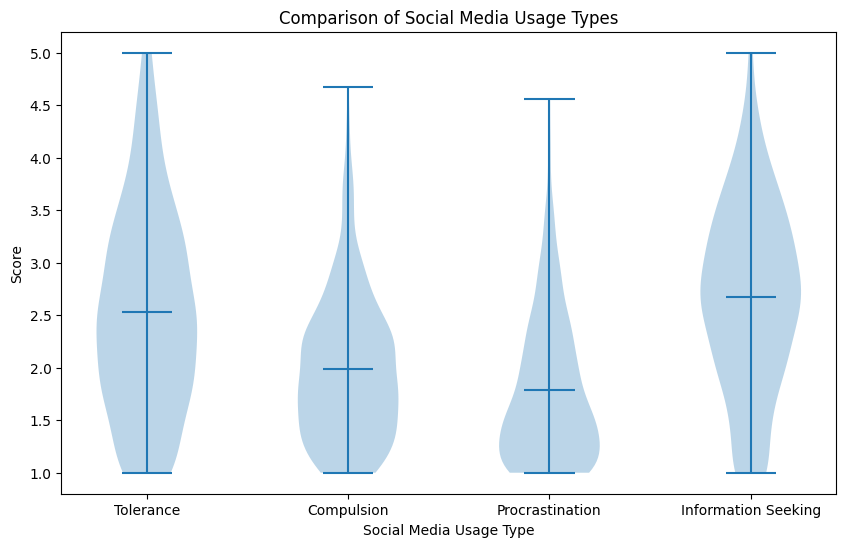

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.violinplot([df['Social Media Tolerance'], df['Social Media Compulsion'], df['Social Media Procrastination'], df['Social Media Information Seeking']], showmeans=True)
plt.xticks([1, 2, 3, 4], ['Tolerance', 'Compulsion', 'Procrastination', 'Information Seeking'])
plt.xlabel('Social Media Usage Type')
plt.ylabel('Score')
_ = plt.title('Comparison of Social Media Usage Types')

This violin plot visualizes the distribution of scores for four types of social media usage: Tolerance, Compulsion, Procrastination, and Information Seeking. Each violin's shape indicates the density of scores at different levels. The horizontal line in each violin shows the median, while the surrounding lines represent interquartile ranges. Tolerance shows a wide spread across all score levels, whereas Procrastination exhibits a narrower range, indicating consistent behaviors. Information Seeking and Compulsion have moderate variability, reflecting diverse usage patterns.

###Distribution of Personality Traits

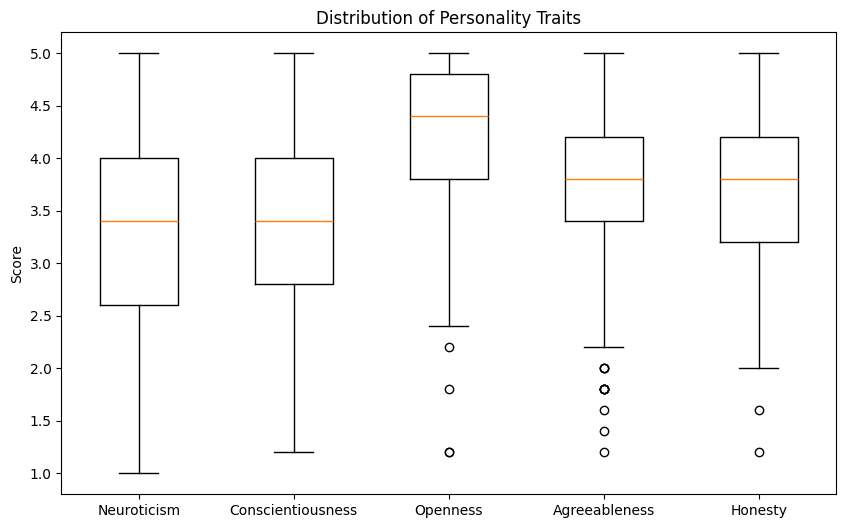

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.boxplot([df['Nevrotik'], df['Conscientiousnes'], df['Openness'], df['Agreeableness'], df['Honesty']], labels=['Neuroticism', 'Conscientiousness', 'Openness', 'Agreeableness', 'Honesty'])
plt.ylabel('Score')
_ = plt.title('Distribution of Personality Traits')

This box plot shows the distribution of scores for five personality traits: Neuroticism, Conscientiousness, Openness, Agreeableness, and Honesty. The orange line represents the median, while the boxes show the interquartile range (IQR). Openness and Agreeableness display outliers below the lower quartile, suggesting some individuals have atypically low scores. Honesty has a smaller spread, reflecting more consistent scores among participants.

###Nevrotik

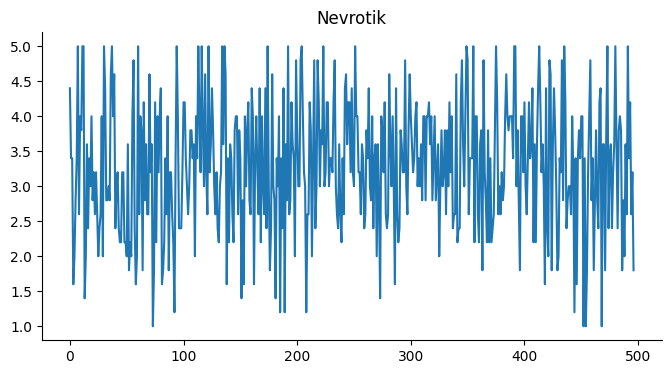

In [ ]:
from matplotlib import pyplot as plt
df['Nevrotik'].plot(kind='line', figsize=(8, 4), title='Nevrotik')
plt.gca().spines[['top', 'right']].set_visible(False)

The line plot illustrates the Nevrotik (Neuroticism) scores for all participants, emphasizing variations over the dataset. Scores fluctuate widely between 1 and 5, indicating significant differences in neurotic tendencies among participants. The dense clustering suggests the majority of individuals exhibit mid-range scores, but there are periodic peaks and troughs highlighting extreme values.

###Happiness vs Fear of Missing Out

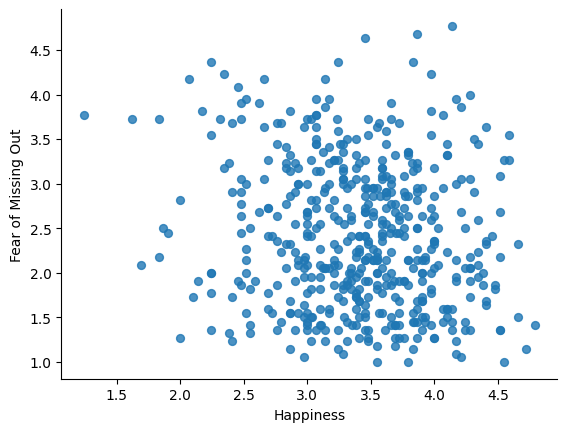

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Happiness', y='Fear of Missing Out', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

This scatter plot explores the relationship between Happiness and Fear of Missing Out (FoMO) scores. While no clear linear trend is apparent, the spread suggests a moderate inverse relationship where higher FoMO scores may correlate with lower happiness. However, data points are scattered across the plot, highlighting individual variability.

###Feature Distributions

Histograms are plotted for each numeric column in the dataset. These plots display the frequency distribution of each feature, helping us understand the spread, central tendency, and skewness of the data.

The bins parameter controls how many intervals the data is split into. In this case, 20 bins are used.

figsize adjusts the size of the figure, making it easier to view the plots.

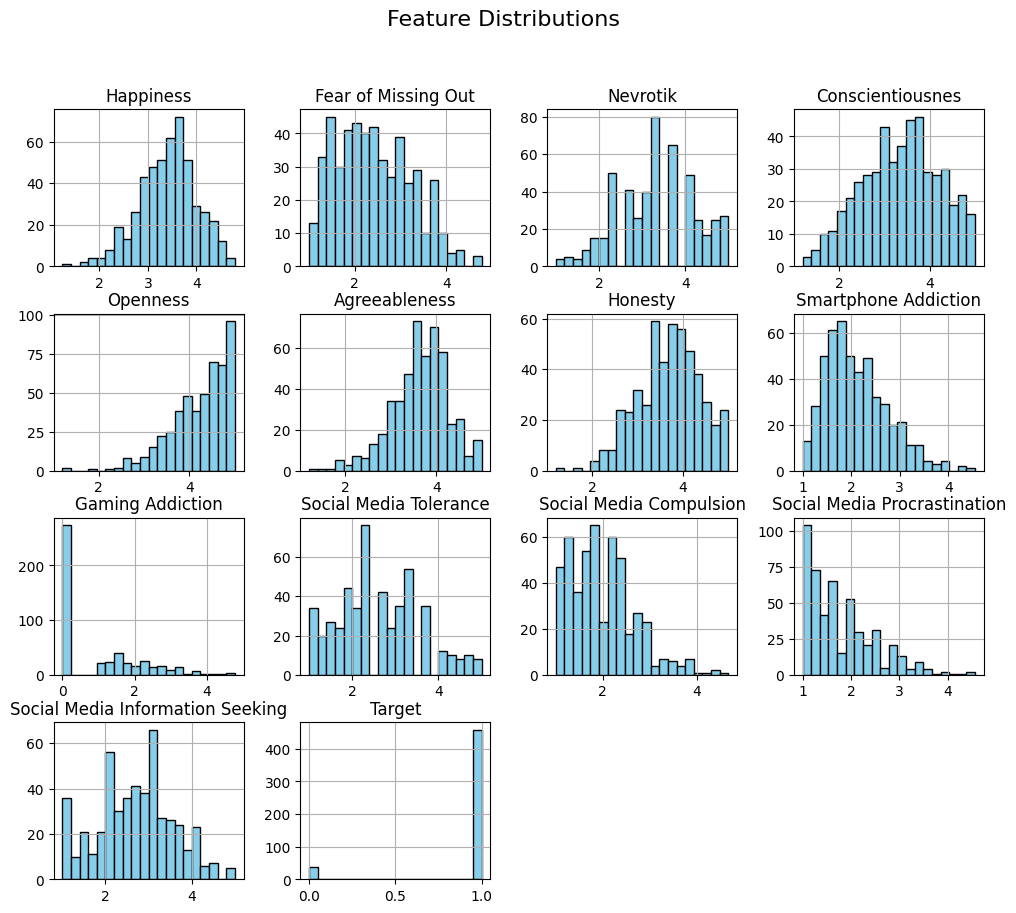

In [ ]:
# Plot histograms
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

The histogram grid displays the frequency distributions of all numerical features in the dataset. Traits like Conscientiousness and Happiness exhibit near-normal distributions, while others, such as Gaming Addiction and Social Media Information Seeking, show right-skewed patterns. The target variable is binary, reflecting the happiness classification.

###Pair Plot of Numerical Features


A pair plot visualizes pairwise relationships between all numerical features in the dataset. It shows scatterplots for each combination of features and KDE (Kernel Density Estimation) plots along the diagonal to represent the distribution of individual features.

The corner=True option ensures that only the lower triangle of the pair plot is shown to avoid redundant plots. The alpha parameter controls the transparency of the scatterplots to avoid overplotting.

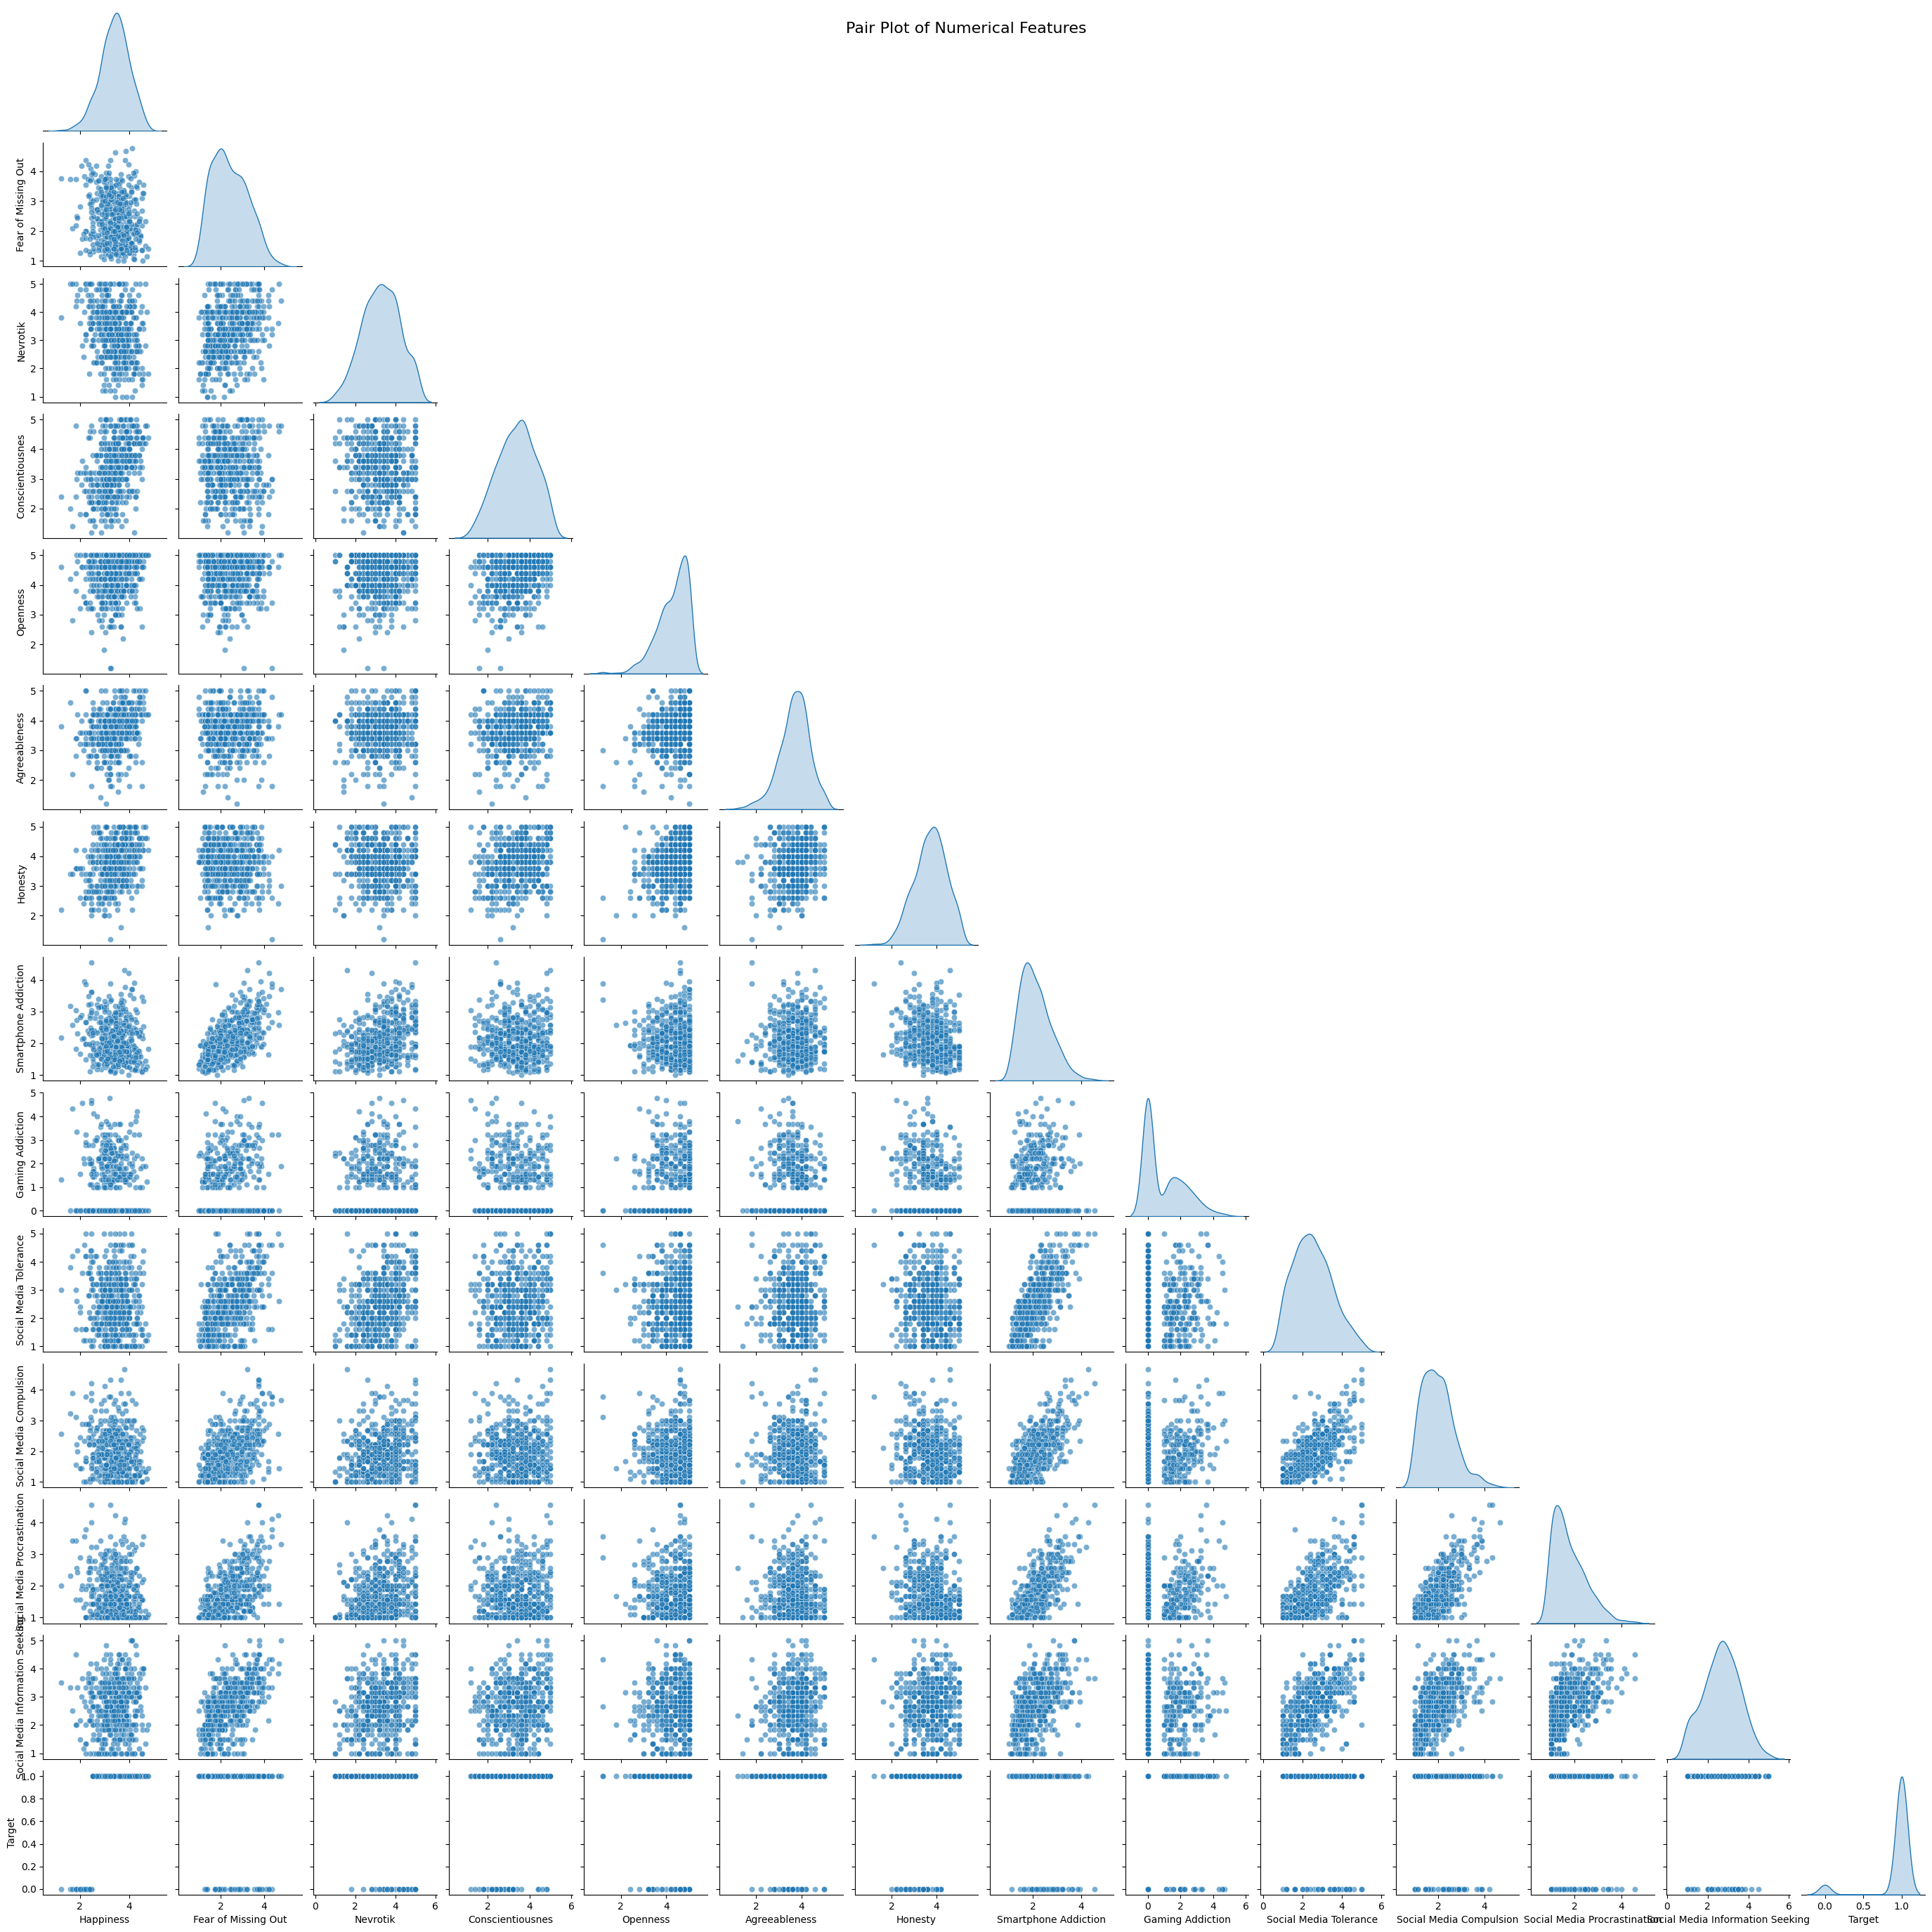

In [ ]:
# Pair plot for features
sns.pairplot(df, diag_kind="kde", corner=True, height=2, plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Numerical Features", fontsize=16)
plt.show()

The pair plot visualizes pairwise relationships between numerical features, with scatter plots below the diagonal and KDE plots along the diagonal. Strong correlations between traits like Social Media Procrastination and Compulsion are evident from dense scatter patterns. KDE curves show distributions, highlighting features like Happiness and FoMO as moderately symmetric.

###Correlation Matrix and Heatmap

**Correlation Matrix:** This computes the correlation coefficients between numerical features in the dataset. The correlation coefficient ranges from -1 to 1, indicating the strength and direction of the linear relationship between two variables.

**Heatmap:** The correlation matrix is visualized using a heatmap, where color intensity reflects the strength of correlation between features. The annot=True option adds the numerical values to each cell of the heatmap. fmt=".2f" formats the values to two decimal places, and cmap="coolwarm" uses a color palette ranging from cool (negative) to warm (positive) colors.

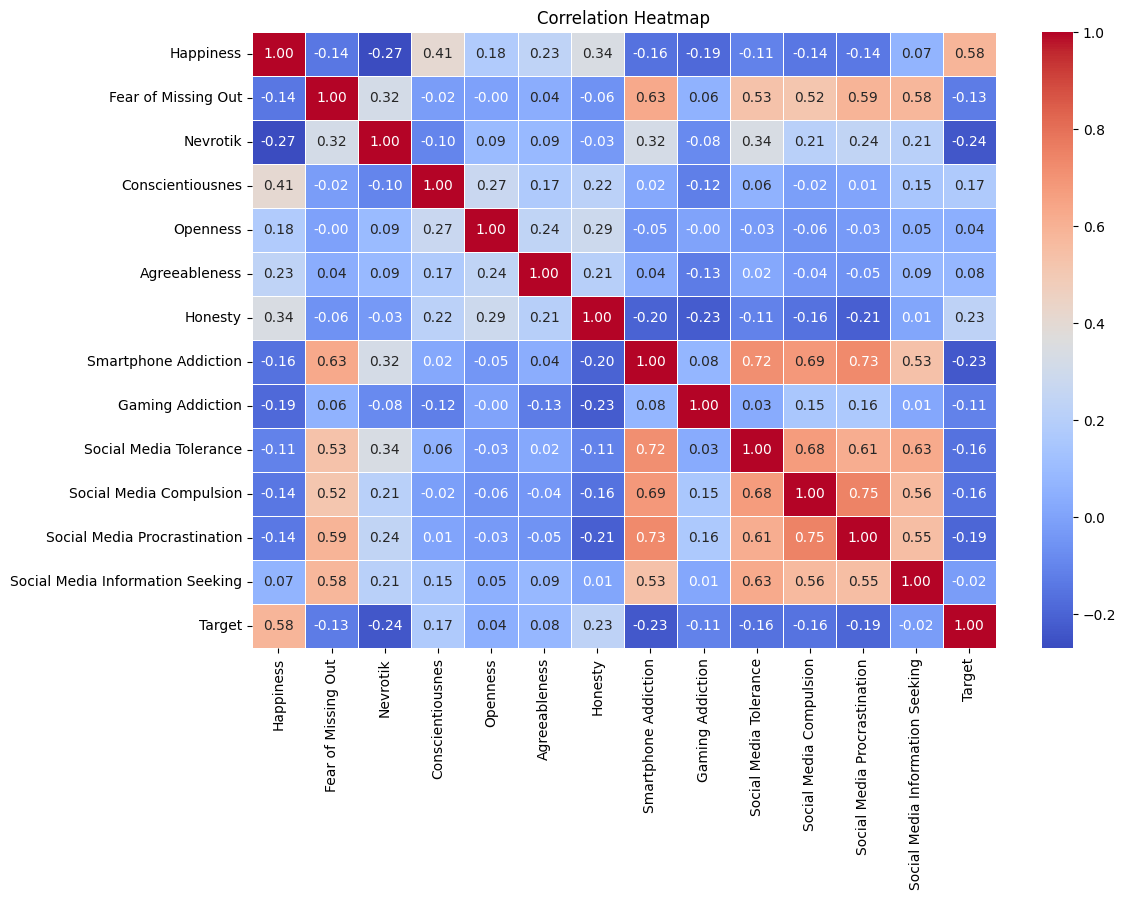

In [ ]:
#correlation matrix
correlation_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

###Scatter plots

**Scatter Plots:** These plots display the relationship between each numeric feature and the target variable. By visualizing these relationships, we can observe trends, detect outliers, and see if any features have a strong or weak correlation with the target.

The loop iterates through each numeric feature (excluding the target column) and generates a scatter plot of that feature against the target.

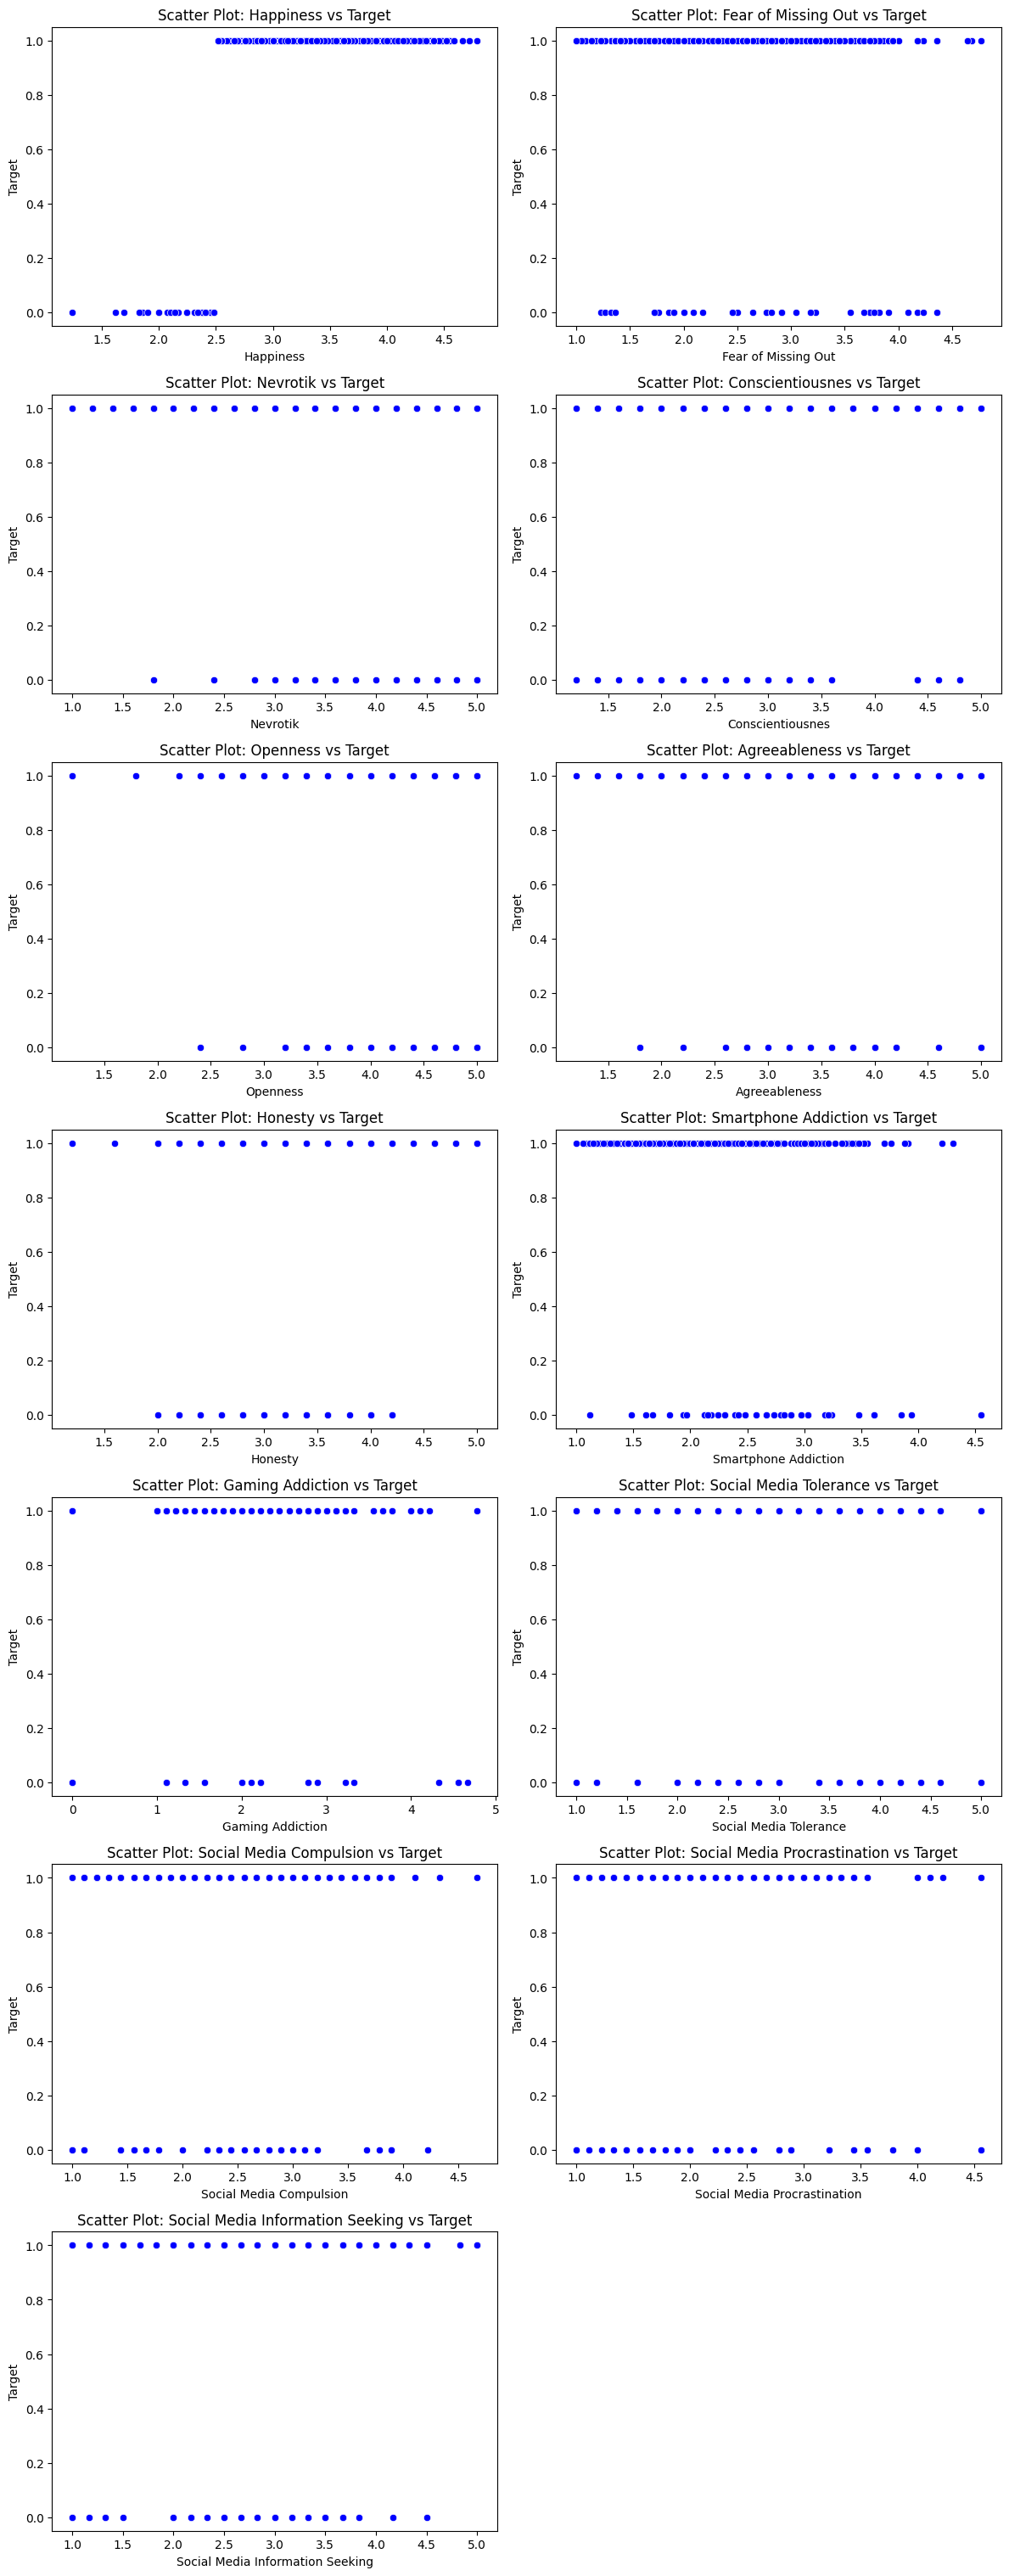

In [ ]:
# Scatter plots for features vs target
target_col = 'Target'  # Replace with the actual target column
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, len(numeric_cols) * 4))
for i, col in enumerate(numeric_cols, 1):
    if col != target_col:  # Avoid target vs target
        plt.subplot(len(numeric_cols)-1, 2, i)
        sns.scatterplot(data=df, x=col, y=target_col, color="blue")
        plt.title(f"Scatter Plot: {col} vs {target_col}")
plt.tight_layout()
plt.show()


##Exploratory data analysis (EDA)

In this section, we perform basic exploratory data analysis (EDA) to get an understanding of the dataset's structure, summary statistics, and check for missing values. This helps us assess the quality of the data before proceeding to model building.

In [ ]:
# View dataset information (column names, data types, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Happiness                         497 non-null    float64
 1   Fear of Missing Out               497 non-null    float64
 2   Nevrotik                          497 non-null    float64
 3   Conscientiousnes                  497 non-null    float64
 4   Openness                          497 non-null    float64
 5   Agreeableness                     497 non-null    float64
 6   Honesty                           497 non-null    float64
 7   Smartphone Addiction              497 non-null    float64
 8   Gaming Addiction                  497 non-null    float64
 9   Social Media Tolerance            497 non-null    float64
 10  Social Media Compulsion           497 non-null    float64
 11  Social Media Procrastination      497 non-null    float64
 12  Social M

**Purpose:** The info() function provides a concise summary of the DataFrame, including the number of entries, column names, data types, and non-null values.

**Output:** The output tells us:
  
  
  1- Number of Entries: The dataset contains 497 rows (entries).
  
  2- Column Names and Data Types: We see that most of the columns are of type float64, with one column (Target) of type int64.
  
  3- Non-null Count: All columns have 497 non-null values, indicating that there are no missing values in the dataset at this point (as confirmed in the next step).

In [ ]:
# Get summary statistics of numerical columns
df.describe()

,Happiness,Fear of Missing Out,Nevrotik,Conscientiousnes,Openness,Agreeableness,Honesty,Smartphone Addiction,Gaming Addiction,Social Media Tolerance,Social Media Compulsion,Social Media Procrastination,Social Media Information Seeking,Target
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,3.408169,2.417344,3.288934,3.371429,4.277264,3.677666,3.719517,2.113199,0.966358,2.526358,1.988310,1.784286,2.676761,0.923541
std,0.589959,0.809434,0.926785,0.897706,0.665499,0.659059,0.709016,0.633349,1.209057,0.971597,0.696236,0.703685,0.883670,0.265998
min,1.240000,1.000000,1.000000,1.200000,1.200000,1.200000,1.200000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.030000,1.770000,2.600000,2.800000,3.800000,3.400000,3.200000,1.640000,0.000000,1.800000,1.440000,1.220000,2.000000,1.000000
50%,3.450000,2.320000,3.400000,3.400000,4.400000,3.800000,3.800000,2.000000,0.000000,2.400000,1.890000,1.560000,2.670000,1.000000
75%,3.830000,3.000000,4.000000,4.000000,4.800000,4.200000,4.200000,2.480000,1.890000,3.200000,2.330000,2.220000,3.330000,1.000000
max,4.790000,4.770000,5.000000,5.000000,5.000000,5.000000,5.000000,4.550000,4.780000,5.000000,4.670000,4.560000,5.000000,1.000000


**Purpose:** The describe() function generates summary statistics for each numerical column, including:


1- Count: Number of non-null entries in each column.

2- Mean: The average value for each column.

3- Standard Deviation (std): Measures the spread or variability of the data.

4- Min/Max: The minimum and maximum values in each column.

5- 25th, 50th (Median), and 75th Percentiles: These give an understanding of the data distribution, helping us assess if the data is skewed or symmetric.

**Output:** This provides a quick statistical overview of the numerical columns, such as:
The mean values for traits like Fear of Missing Out, Nevrotik, etc.
Range of values (e.g., Happiness ranges from low to high values).
This helps to identify potential outliers or variables that may need further transformation.

### Variables Overview

#### Dependent and Independent Variables:
**Dependent Variable (Target)**: Happiness (0 = Unhappy, 1 = Happy).<br><br>
**Independent Variables**:

Personality Traits: Neuroticism, Openness, Agreeableness, Conscientiousness, Honesty.<br><br>
Digital Behaviors: Smartphone Addiction, Gaming Addiction, Social Media Habits.<br><br>

#### Data Characteristics:
All columns except the target are numerical with continuous values.

The dataset is complete, with no missing values in any column.

Variables reflect psychological and technological usage metrics, critical for studying correlations between mental health and technology usage.


##Checking missing values

In [ ]:
# Check for any missing values
df.isnull().sum()

,0
Happiness,0
Fear of Missing Out,0
Nevrotik,0
Conscientiousnes,0
Openness,0
Agreeableness,0
Honesty,0
Smartphone Addiction,0
Gaming Addiction,0
Social Media Tolerance,0


**Purpose:** The isnull() function returns a DataFrame of boolean values (True or False), indicating whether each cell is missing (True) or not (False). Using sum() gives the total count of missing values for each column.

**Output:** The output indicates that there are 0 missing values in every column of the dataset. This means that no further handling of missing data is necessary at this stage, and the dataset is complete for modeling.

##Outlier Detection

We are using box plots to detect outliers.
Visualizing Outliers with Box Plots.

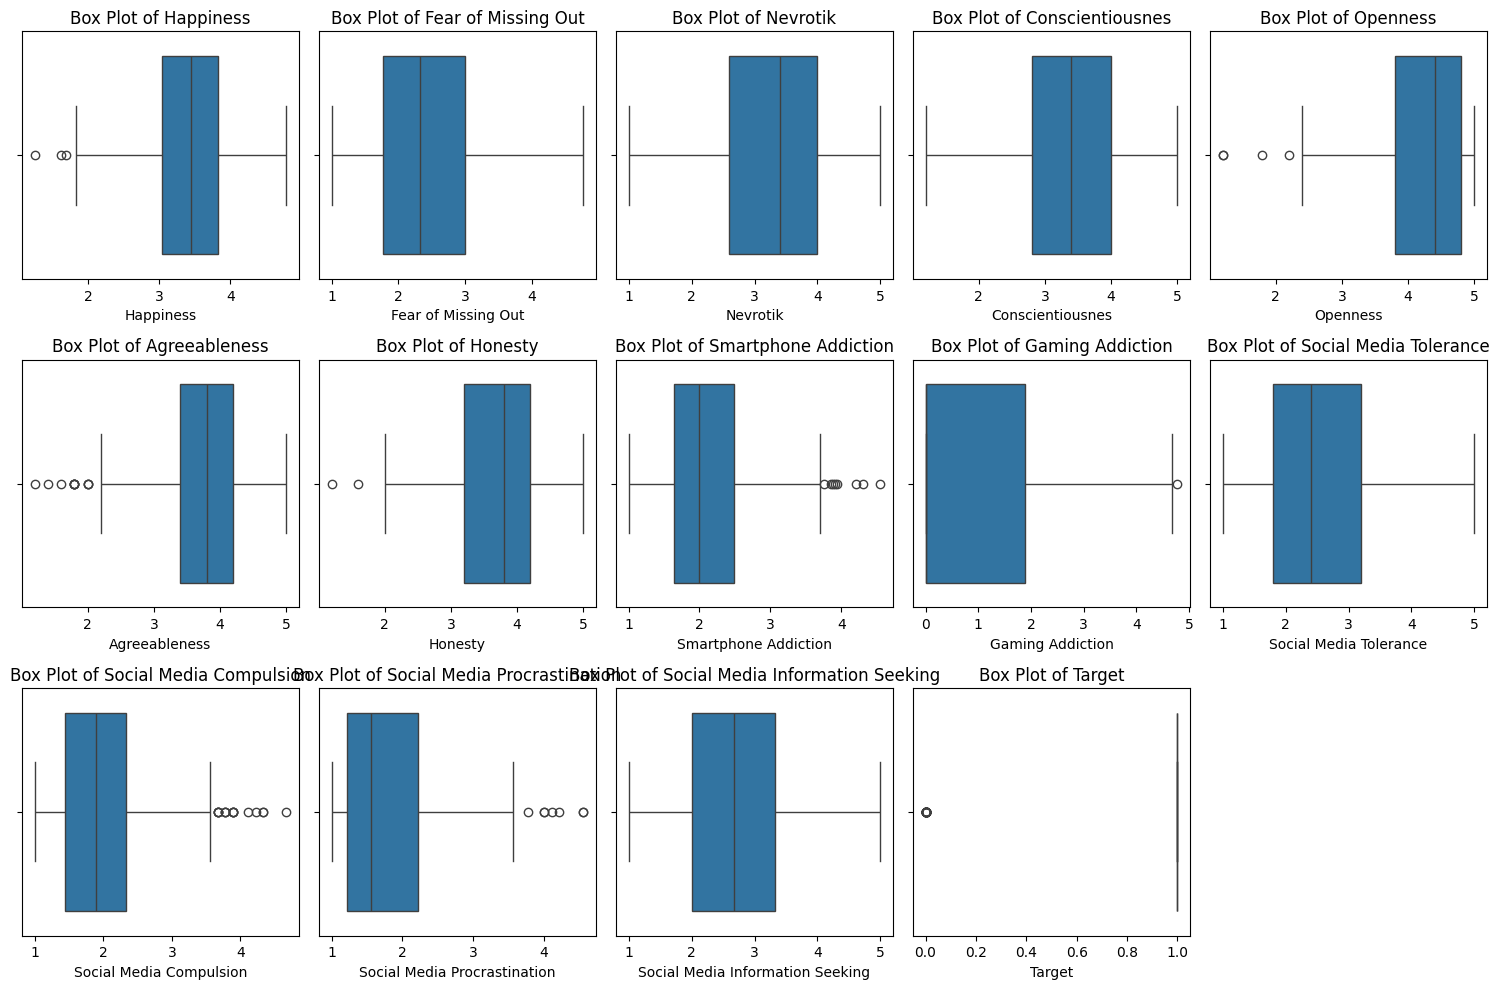

In [ ]:
from scipy.stats import zscore

# Step 1: List of numerical columns
numerical_columns = df.columns.tolist()

# Step 2: Visualize outliers using box plot
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)  # Create a grid of subplots (3 rows, 5 columns)
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

Outlier Detection Using the IQR (Interquartile Range) Method



In [ ]:
# Step 3: Detect outliers using IQR (Interquartile Range) method
outliers_iqr = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the column
    outliers_iqr[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print outliers for each column
    if not outliers_iqr[column].empty:
        print(f"Outliers detected in {column} (IQR method):")
        print(outliers_iqr[column][[column]])
        print("\n")
    else:
        print(f"No outliers detected in {column} (IQR method)\n")

Outliers detected in Happiness (IQR method):
     Happiness
11        1.62
391       1.69
463       1.24


No outliers detected in Fear of Missing Out (IQR method)

No outliers detected in Nevrotik (IQR method)

No outliers detected in Conscientiousnes (IQR method)

Outliers detected in Openness (IQR method):
     Openness
168       2.2
181       1.8
402       1.2
492       1.2


Outliers detected in Agreeableness (IQR method):
     Agreeableness
7              1.8
13             1.8
14             2.0
90             1.8
151            1.6
215            1.4
247            1.8
273            2.0
303            2.0
475            1.2
492            1.8


Outliers detected in Honesty (IQR method):
     Honesty
492      1.2
495      1.6


Outliers detected in Smartphone Addiction (IQR method):
     Smartphone Addiction
3                    4.30
7                    4.55
28                   3.94
158                  4.21
199                  3.85
226                  3.91
422             

**Purpose:** This method detects outliers based on the Interquartile Range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3) of a dataset.

**Outlier Criteria:**
Any data point that lies below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

This is a standard rule, although you can adjust the multiplier (1.5) depending on how strict you want to be about defining outliers.

**Code breakdown:**

Q1 = df[column].quantile(0.25) and Q3 = df[column].quantile(0.75) calculate the 1st and 3rd quartiles for each column.
IQR = Q3 - Q1 computes the interquartile range.

The lower and upper bounds are then computed to identify data points that fall outside this range.
If any values fall outside these bounds, they are flagged as outliers and stored in outliers_iqr[column].
The loop prints out the outliers (if any) detected for each column.

**Outlier Detection** Using the **Z-Score** Method

**Purpose:** The Z-score method detects outliers assuming that the data is normally distributed.

**Z-Score Calculation:** A Z-score measures how many standard deviations away a data point is from the mean. A Z-score above a threshold (typically 3 or -3) indicates that the point is far from the mean and can be considered an outlier.


**Z-score formula:**

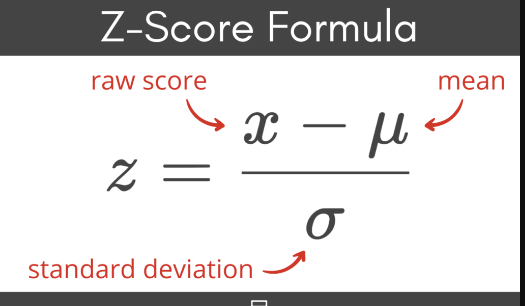



𝑋 is the data point.


𝜇 is the mean of the data.


𝜎 is the standard deviation of the data.


**Code breakdown:**

df_z = df.apply(zscore) applies the Z-score function to each numerical column of the DataFrame. This standardizes the values so that the mean is 0 and the standard deviation is 1.
The threshold is set to 3, which is a common cutoff for identifying outliers.
outliers_zscore[column] = df_z[df_z[column].abs() > threshold] finds rows where the absolute Z-score value is greater than the threshold.
The loop then prints any detected outliers for each column.

In [ ]:
# Step 4: Detect outliers using Z-Score method (assuming normal distribution)
df_z = df.apply(zscore)

# Define a threshold for outliers
threshold = 3

outliers_zscore = {}

for column in numerical_columns:
    outliers_zscore[column] = df_z[df_z[column].abs() > threshold]

    # Print outliers for each column
    if not outliers_zscore[column].empty:
        print(f"Outliers detected in {column} (Z-Score method):")
        print(outliers_zscore[column][[column]])
        print("\n")
    else:
        print(f"No outliers detected in {column} (Z-Score method)\n")


Outliers detected in Happiness (Z-Score method):
     Happiness
11   -3.034061
463  -3.678823


No outliers detected in Fear of Missing Out (Z-Score method)

No outliers detected in Nevrotik (Z-Score method)

No outliers detected in Conscientiousnes (Z-Score method)

Outliers detected in Openness (Z-Score method):
     Openness
168 -3.124506
181 -3.726164
402 -4.628651
492 -4.628651


Outliers detected in Agreeableness (Z-Score method):
     Agreeableness
151      -3.155649
215      -3.459417
475      -3.763186


Outliers detected in Honesty (Z-Score method):
      Honesty
492 -3.557123


Outliers detected in Smartphone Addiction (Z-Score method):
     Smartphone Addiction
3                3.456235
7                3.851359
158              3.313990


Outliers detected in Gaming Addiction (Z-Score method):
    Gaming Addiction
0           3.066335
47          3.157406


No outliers detected in Social Media Tolerance (Z-Score method)

Outliers detected in Social Media Compulsion (Z-Scor

Z-score for Target columns may be ignored because of Z-score method is not optimal for non continuous binary data.

**Result:**
After checking the outliers manually, we decided to keep them since we condsider them natural variability.

##Feature selection

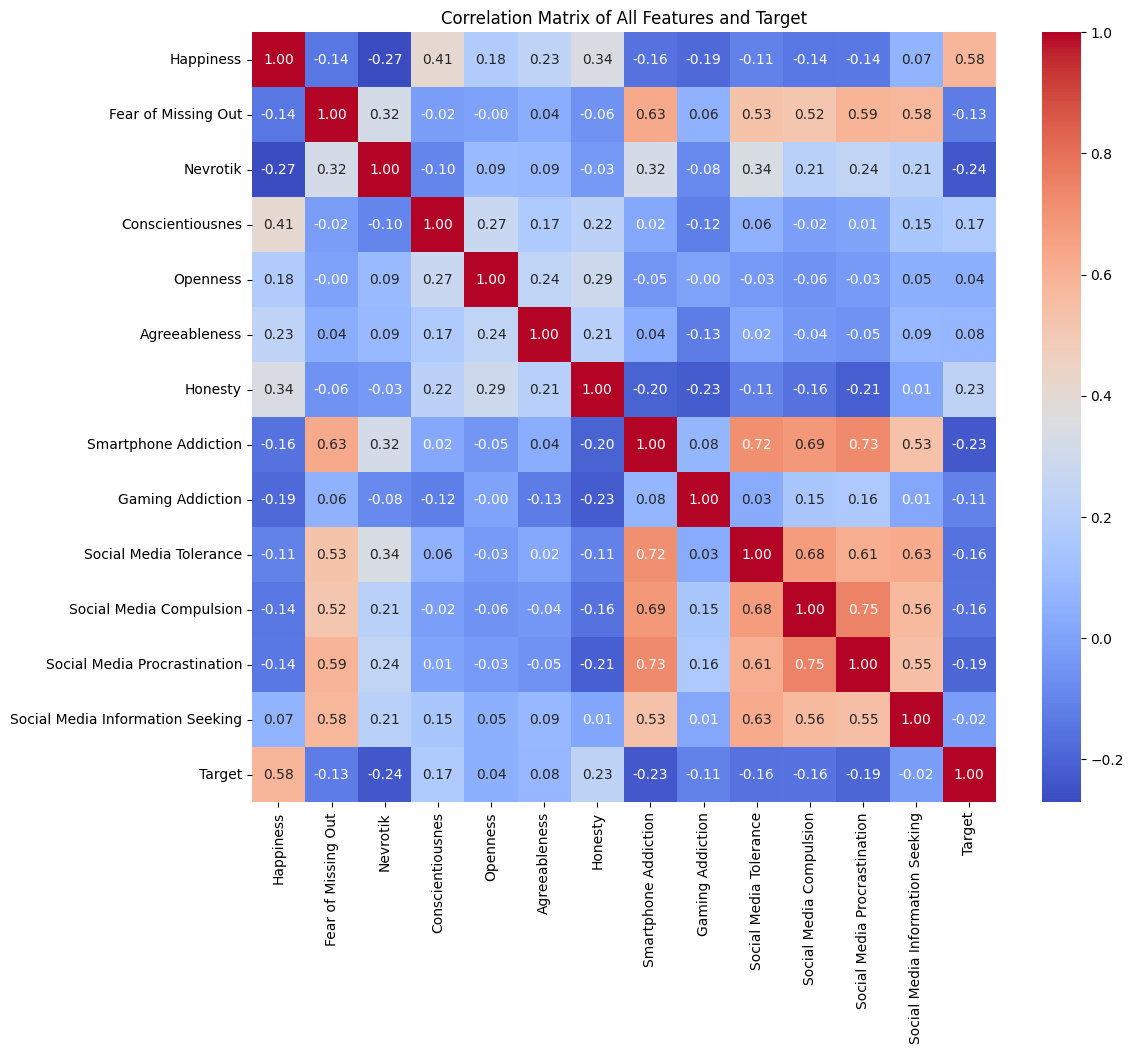

In [ ]:
# 1. Select features and target variable
features_and_target = df.columns  # Includes all columns, including 'Happiness'

# 2. Create the correlation matrix
corr_matrix_all = df[features_and_target].corr()

# 3. Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features and Target")
plt.show()

+1: Perfect positive correlation (both variables increase together).

-1: Perfect negative correlation (one variable increases while the other decreases).

0: No linear relationship.

###What Does the Correlation Matrix Show?

**Heatmap Representation:** The heatmap provides a color-coded representation of the correlation matrix. The colors help quickly identify which features are positively or negatively correlated with each other and with the target variable.

**Key Insights:**
Diagonal Values: The diagonal of the heatmap will always be 1, as each feature is perfectly correlated with itself.

**Positive Correlation:** Features with values closer to +1 are positively correlated, meaning as one feature increases, the other does as well.

**Negative Correlation:** Features with values closer to -1 are negatively correlated, meaning as one feature increases, the other decreases.
No Correlation: A value close to 0 indicates no linear relationship between the variables.

###Why is This Important?

**Feature Selection:** The correlation matrix helps in feature selection by identifying highly correlated features. If two features are highly correlated, you may choose to keep only one of them in the model to avoid multicollinearity, which can affect model performance.

**Target Relationship:** By looking at the correlations between features and the target variable, you can identify which features might be the most informative for predicting the target. For example, features that have a high positive or negative correlation with the target are likely to be important predictors.

**Understanding Data:** The correlation matrix helps you understand the relationships between features, which can be crucial for interpreting model outputs and improving your model by transforming or combining features effectively.



In [ ]:
# 1. Calculate correlations with the target variable
correlations = df.corr()['Happiness'].abs().sort_values(ascending=False)
# We use .abs() to consider both positive and negative correlations

# 2. Display the correlations
print("Correlations with Target Variable (Happiness):")
print(correlations)

# 3. Select features based on a threshold
threshold = 0.3
selected_features = correlations[correlations > threshold].index

# 4. Print the selected features
print("\nSelected Features (Correlation > threshold):")
print(selected_features)

Correlations with Target Variable (Happiness):
Happiness                           1.000000
Target                              0.584437
Conscientiousnes                    0.406630
Honesty                             0.342402
Nevrotik                            0.270650
Agreeableness                       0.234866
Gaming Addiction                    0.185845
Openness                            0.180572
Smartphone Addiction                0.157130
Fear of Missing Out                 0.142976
Social Media Compulsion             0.142485
Social Media Procrastination        0.138365
Social Media Tolerance              0.108168
Social Media Information Seeking    0.065390
Name: Happiness, dtype: float64

Selected Features (Correlation > threshold):
Index(['Happiness', 'Target', 'Conscientiousnes', 'Honesty'], dtype='object')


###Explanation and Implications:
**Feature Selection:**

The correlation analysis helps in feature selection by identifying which features are closely related to the target variable. For instance, Conscientiousness and Honesty are the features with higher correlations, making them important predictors for the target.


**Multicollinearity:**

The correlation between Happiness and the Target variable is strong (0.584), suggesting that these two features may be highly related. Depending on the analysis approach, you may want to carefully handle them to avoid issues like multicollinearity in regression models.


**Weak Correlations:**

Features like Social Media Information Seeking and Gaming Addiction have weaker correlations with happiness (close to or less than 0.2), meaning they may not be as predictive of happiness based on linear relationships.


After feature selection, we have evaluated the model and decided to keep all the features even if some has a weak correlation with the happiness. We analyze also the relations of the features between each other. We tried to train model with removing the two weekest features and the model performance had been affected negatively.

##Theory

First, we import libraries like pandas to handle structured data, numpy for numerical calculations, and seaborn and matplotlib to create visualizations that help us understand patterns and trends in the data. These libraries are essential for exploring and preparing data before feeding it into a machine learning model.<br><br> The machine learning parts come from scikit-learn. train_test_split, divides the data into two groups: one for training the model and another for testing it to see how well it performs on new, unseen data.<br><br> The code uses a Random Forest Regressor, which is a machine learning algorithm that works by building multiple decision trees and averaging their predictions to make accurate forecasts. To evaluate the model, metrics like mean squared error (MSE) and R² score are calculated. MSE measures how far off the predictions are from the actual values. cross-validation, a technique that splits the data into several parts to check the model’s performance more thoroughly, ensuring it works well on different subsets of data. <br><br>To begin the process, we first check for missing values in the dataset to understand the completeness of the data. This is achieved by calculating the count and percentage of missing values for each column. We used Pair plots  for observing feature relationships. Once the data is cleaned and preprocessed, we train the model. We split the dataset into a training and testing set.

In [ ]:
#Importing the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')

In [ ]:
# Adjust happiness threshold to balance the target classes
df['Target'] = df['Happiness'].apply(lambda x: 1 if x > 3.50 else 0)

##Methodology

### Data Preprocessing: Target Variable Transformation

The happiness scores were converted into binary values to simplify the prediction task. Scores above 3.50 were labeled as "high happiness" (1), while scores equal to or below 3.50 were labeled as "low happiness" (0).


In our dataset when happiness is scaled to 5. When the value in happiness column is under 2.50, the corresponding value in the target column is 0, when the value in happiness column is over 2.50, the corresponding value in the target column is 1. We observe that the ratio of the distribution of 0s and 1s in the target column is unbalanced. We decide to change the limit in this context.


We have changed the limit 2.50 in happiness to 3.50 to get more balanced distribution of 1s and 0s in Target column. This way we get more accuracy in both training and testing data.

In [ ]:
# Drop 'Happiness' column as it's now encoded in 'Target'
X = df.drop(columns=['Target', 'Happiness'])
y = df['Target']

In [ ]:
# 2. Apply SMOTE to handle class imbalance (after dropping 'Happiness' column)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Handling Class Imbalance

To address the class imbalance, we applied the SMOTE technique, which generates synthetic samples for the minority class. This ensures the models can learn patterns from both classes effectively.


###Why SMOTE is Used?



**Class Imbalance Issue:**

In many classification problems, especially with rare events or underrepresented groups (e.g., fraud detection, disease prediction), the dataset may have an imbalanced target variable. If one class is much larger than the other, the model will be biased toward predicting the majority class.


**SMOTE Method:**

SMOTE works by selecting examples of the minority class, finding their nearest neighbors, and generating synthetic samples that are combinations of the original samples and the neighbors. These new synthetic samples help balance the class distribution and provide the model with more diverse examples to learn from.


###Impact of SMOTE


**Balanced Dataset:**

After applying SMOTE, the dataset will have an equal number of instances for each class, improving the model's ability to learn from the minority class.
Better Model Performance:

Models trained on balanced datasets tend to perform better, especially on imbalanced classification problems, as they are less likely to be biased toward predicting the majority class.


**Caution:**

While SMOTE can improve performance, it's important to ensure that the synthetic samples do not lead to overfitting, as they may introduce noise if the number of synthetic samples is too large or if the model is too complex.

### Feature Scaling
Next, we standardized the features using StandardScaler to make sure all the variables had similar scales, which is important for many machine learning models.

In [ ]:
# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

Feature scaling is the process of standardizing or normalizing the range of independent variables (features) in the dataset. It ensures that features with different scales do not bias the model, especially for algorithms that rely on distances (e.g., KNN, SVM) or gradient-based optimization.


**StandardScaler Initialization:**

scaler = StandardScaler(): This initializes the StandardScaler, which standardizes the features by removing the mean and scaling to unit variance (i.e., transforming them to have a mean of 0 and a standard deviation of 1).


**Applying Scaling:**

X_scaled = scaler.fit_transform(X_resampled):
fit_transform first calculates the mean and standard deviation of each feature in X_resampled (the resampled data from SMOTE).
Then, it scales each feature to have a mean of 0 and a standard deviation of 1.
X_scaled is the new, scaled feature set.
Why Feature Scaling is Important:

**Consistency:**

Ensures that features with different units (e.g., age in years, income in dollars) are treated equally.
Improved Model Performance: Some models (e.g., gradient descent-based ones) perform better and converge faster when features are on a similar scale.
Avoid Bias: Prevents models from being biased towards features with larger numerical ranges.

### Dimensionality Reduction
Then, we applied Principal Component Analysis (PCA) to reduce the number of features while keeping 95% of the original data's important information, helping the model run more efficiently.

In [ ]:
# 4. Apply PCA for Dimensionality Reduction (limit the number of components)
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

###Data Splitting
The data was split into training and testing sets, with 80% for training and 20% for testing

In [ ]:
# 5. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)


X_pca represents the feature set (likely after dimensionality reduction with PCA).
y_resampled represents the target labels.
The test_size=0.2 means 20% of the data will be used for testing, and 80% for training.
random_state=42 ensures reproducibility of the random split.

### Model Training and Hyperparameter Tuning

We used a Random Forest Classifier, a powerful model, and tuned its settings with RandomizedSearchCV to find the best combination of hyperparameters.

In [ ]:
# 6. Random Forest with Hyperparameter Tuning and Cross-Validation
#class_weight='balanced' ensures that the model will handle class imbalance by adjusting weights inversely proportional to class frequencies in the data.
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')


In [ ]:
# Hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

**A dictionary is created to define the hyperparameters to be tuned:**

**These parameters will be searched over in the RandomizedSearchCV process:**

**n_estimators:** Number of trees in the forest.

**max_depth:** Maximum depth of the trees.

**min_samples_split:** Minimum number of samples required to split an internal node.

**min_samples_leaf:** Minimum number of samples required to be at a leaf node.

**max_features:** Number of features to consider when looking for the best split.

In [ ]:
# Perform RandomizedSearchCV for hyperparameter tuning
# The RandomizedSearchCV is applied to find the best hyperparameters
# n_iter=20: Random search will evaluate 20 different combinations of hyperparameters.
# cv=5: 5-fold cross-validation will be used to evaluate the model's performance.
# n_jobs=-1: This uses all available CPUs to speed up the process.
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, random_state=42, n_jobs=-1, cv=5)
random_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV
print("Best Parameters from Randomized Search:", random_search.best_params_)

# 7. Train Model with the Best Parameters
rf_best = random_search.best_estimator_
rf_best.fit(X_train, y_train)

# 8. Train and Test Accuracy
train_accuracy = rf_best.score(X_train, y_train)
test_accuracy = rf_best.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Best Parameters from Randomized Search: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}
Train Accuracy: 0.9357798165137615
Test Accuracy: 0.8181818181818182


## Results and Discussion

### Random Forest Model Performance

The Random Forest model performed well in all metrics after optimization using randomized search. The optimized hyperparameters were:<br><br>
n_estimators : 100

min_samples_split : 2

min_samples_leaf : 4

max_features : 'sqrt'

max_depth : 15

### Accuracy
**Training Accuracy**: 93.6%

**Test Accuracy**: 81.8%

The model's training accuracy indicates it learned good patterns, but the test accuracy shows a slight drop when generalized to unseen data. This gap suggests potential overfitting or differences in the nature of the training and test data.


###Model Evaluation

The model was trained with the best settings, and we measured its performance on the test set using accuracy, precision, recall, and F1-score, as well as by looking at the confusion matrix to understand how well it made predictions.

In [ ]:
# 9. Evaluation - Classification Report and Confusion Matrix
y_pred = rf_best.predict(X_test)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        57
           1       0.81      0.81      0.81        53

    accuracy                           0.82       110
   macro avg       0.82      0.82      0.82       110
weighted avg       0.82      0.82      0.82       110



### Classification Metrics (Test Set)
**Precision, Recall, and F1-Score**: 0.82 for both classes, showing balanced performance across the dataset.

**Macro and Weighted Averages**: 0.82, confirming consistency and reliability.

### Confusion Matrix
**True Positive Class 0**: 47

**True Negative Class 1**: 43

**False Positive Class 0**: 10

**False Negative Class 1**: 10

While most instances were correctly classified, there were 10 false positives and 10 false negatives, indicating a modest level of misclassification without class bias.


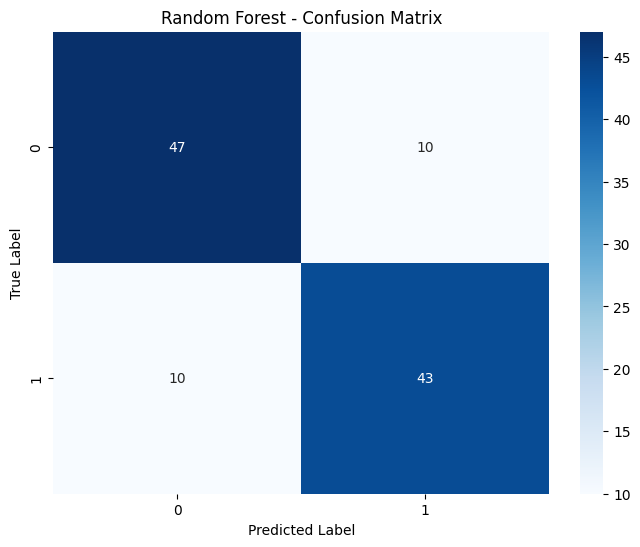

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The model's performance on the test set is evaluated using a classification report and confusion matrix.

The classification report gives precision, recall, and F1-score metrics, while the confusion matrix shows the true positive, true negative, false positive, and false negative values.


###Interpretation of Model:

The model in question is a Random Forest Classifier trained with hyperparameter tuning using RandomizedSearchCV.

The best hyperparameters after tuning are:

**n_estimators:** 100

**max_depth:** 15

**min_samples_split:** 2

**min_samples_leaf:** 4

**max_features:** 'sqrt'

The model achieved a training accuracy of 93.6% and a test accuracy of 81.8%. The difference in accuracy suggests some overfitting, as the model performs better on the training data than on the test data.

Cross-validation performance provides a more stable estimate of model performance, showing the mean accuracy and standard deviation across multiple splits.

### Discussion
The model achieves a test accuracy of 81.8% with balanced metrics, making it reliable and unbiased. However, the gap between training and test accuracy suggests overfitting. Key highlights include:

#### Strengths:
Balanced performance with precision and recall both at 0.82 for both classes.

Even distribution of misclassifications in the confusion matrix, minimizing bias.

#### Limitations:
**Overfitting**: A significant gap between training and test accuracy suggests the model may have learned noise or peculiar patterns from the training data.

**Misclassification**: Combined false positives and false negatives reduce test accuracy, which may be problematic in applications where misclassification costs are high.

#### Possible Causes of Overfitting:
Low values for min_samples_split=2 may have increased the model's complexity.

The training and test set distributions may differ, reducing generalizability.

<ipython-input-33-a4cd5d0b4523>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracy_df, x='Dataset', y='Accuracy', palette='viridis')


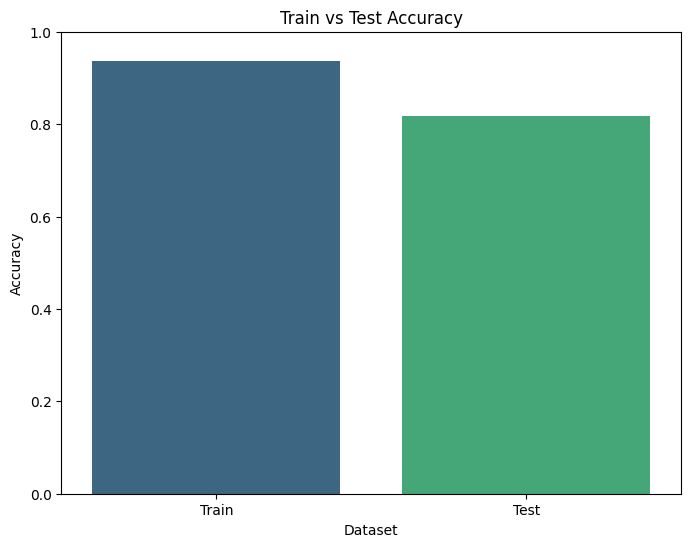

In [ ]:
# Visualize Train and Test Accuracy
plt.figure(figsize=(8, 6))
accuracy_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy]
}
accuracy_df = pd.DataFrame(accuracy_data)

sns.barplot(data=accuracy_df, x='Dataset', y='Accuracy', palette='viridis')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Dataset")
plt.show()


##Conclusion

The Random Forest model was optimized through randomized search and demonstrated a very good performance in classifying the dataset. The overall test accuracy of 81.8% and balanced precision, recall, and F1-scores of 0.82 for both classes indicate that the model handles the classification task without bias toward either class. The confusion matrix is further supportive of the model's reliability, with a balanced distribution of true positives and true negatives for both classes.
<br><br>
However, the gap between the training accuracy of 93.6% and test accuracy does hint at a degree of overfitting, where the model is learning certain patterns in the training data that do not generalize as well to the test set. Misclassifications, though limited, pinpoint areas for improvement in terms of reducing false positives and false negatives.
<br><br>
Regularization techniques for tackling overfitting, analysis of feature importance, and cross-validation are other directions to further develop this model. Checking further improvements with alternative ensemble methods, such as Gradient Boosting or XGBoost, may be considered.
<br><br>
Summed up, the model establishes a strong baseline in view of classification tasks; performance is reliable and well-balanced, but at the same time, it holds potential for refinement that will improve generalization and misclassifications.
<br><br>
From the correlation matrix, one can notice more about how technology-related behaviors and personality traits interact in influencing mental wellbeing. Happiness, for instance, is strongly correlated with the target variable at 0.58, suggesting its pivotal role in mental wellbeing. Perhaps improvement in happiness could offset negative effects from digital dependency. Specifically, FoMO is moderately positively related to Smartphone Addiction, 0.63, and to other social media behaviors such as compulsion, 0.52, and procrastination, 0.59. These results again underpin the view that FoMO exacerbates compulsive technology use, which in turn feeds into emotional instability and anxiety.
<br><br>
Personality traits also play a significant role. Conscientiousness has a mild positive correlation with the target of 0.17 and negative correlations with the maladaptive behaviors of Social Media Procrastination and Smartphone Addiction at -0.21 and -0.05, respectively, thus pointing toward its protective role against digital dependency. Neuroticism, on the contrary, correlates positively with the Fear of Missing Out at 0.32 and negatively with the target at -0.24, indicating that it amplifies susceptibility to negative emotions associated with technology overuse.
<br><br>
Digital behaviors are strongly related to each other. Social Media Compulsion, Procrastination, and Tolerance exhibit very high interrelations, above 0.65. These behaviors together influence mental health, as reflected in their negative moderate-to-strong correlations with the target variable. Similarly, Smartphone Addiction is one of the major contributors to mental health issues, showing a moderate negative relation with the target of -0.23 and is highly related to social media behaviors.
<br><br>
The correlation matrix findings confirm the outputs of the Random Forest model, reinforcing how emotional markers (e.g., happiness, FoMO) and digital behaviors are important in shaping mental wellness outcomes. In turn, the model identified this relationship rather well, with an overall test accuracy of 81.8% using balanced metrics, which indicated the utility of the model for these complex patterns.
<br><br>
###Key takeaways from the analysis are given below:

Interventions in the enhancement of happiness and reduction of FoMO might mitigate compulsive digital behaviors and improve mental well-being.
Personality traits such as conscientiousness are protective factors, while neuroticism exacerbates the challenges.
Approaches that take into account the interconnected nature of social media habits, including compulsion and procrastination, will go a long way in reducing the impact of digital dependency.
The following research, combining data-driven insights with psychological knowledge, calls for the promotion of healthier technology use and good mental well-being in a digitally developing world.
Potential Impact Areas and Utilization of the Project

The project is immensely impactful across various verticals, with its solutions being crucial to the various challenges that arise with the rise in technology integration into everyday life. Here's how and where the findings can be applied as a function of answering that critical "so what?" question:
<br><br>
###1. Mental Health and Well-being Interventions
**Counseling and Therapy:** The findings of the study can guide mental health professionals in recognizing those who are more prone to anxiety, depression, or decreased happiness because of excessive digital dependency. For example, FoMO and Smartphone Addiction scores may be used for client screening and in designing personalized intervention strategies.
**Digital Detox Programs:** Such findings will therefore inform a better structure in implementing initiatives for healthier technologies, including digital detox programs to help reduce compulsive behaviors related to procrastination and social media overuse.

###2. Educational and Workplace Applications
**Awareness Campaigns:** This will enlighten schools, colleges, and workplaces on the various side effects brought about by dependency on technology in areas such as mental health, productive capacity, and interpersonal relations.
**Training Programs:** Programs of enhancing conscientiousness or strategies that teach ways to mitigate FoMo can help people manage technology usage better and increase focus and emotional stability.

###3. Technology Design and Policy
**Ethical Tech Design:** Technology companies may use such findings to create platforms with minimal features that make them addictive-for example, endless scrolling, notification overload-and reduce their deleterious effects on the mental health of users.
**Public Policy and Regulation:** Policymakers can make use of this research as a building block for guidelines or regulations to ensure that the platforms incentivize features such as screen-time limits, usage tracking, and intentional breaks to protect users' mental wellbeing.

###4. Parental Guidance and Youth Development
**Parental Tools:** Parents can use insights from the project to better understand how traits like neuroticism or FoMO might influence their children’s technology use and mental health, enabling them to foster healthier habits.
**Educational Curricula:** Schools can integrate findings into digital literacy programs to teach students about the psychological impact of technology use and strategies for maintaining mental wellness.

###5. Community and Social Impact
**Support Groups and Initiatives:** Community organizations can design support groups for individuals struggling with gaming addiction, smartphone dependency, or social media overuse. This study provides evidence-based data on which factors to prioritize.
**Mental Wellness Campaigns:** Governments or NGOs can launch public campaigns to promote happiness and mental health by targeting key variables like reducing social media procrastination or improving honesty and conscientiousness.

###6. Academic and Research Contributions
**Foundation for Further Research:** This project contributes to the growing body of research on digital dependency, providing a framework for further studies into how personality traits, emotional factors, and technology interact.
**Cross-Disciplinary Applications:** Psychologists, sociologists, and technologists can use these findings to develop interdisciplinary solutions for mitigating digital dependency and its effects on mental wellness.

###7. Productivity and Focus Enhancement
**Productivity Tools:** Such insights into digital behaviors and their impact on focus and stress may inform the development of productivity applications or tools that help reduce distractions and promote balanced technology use. Workplace Wellness Programs: These findings could be used by organizations to help employees manage their screen time and improve their mental health, thus improving workplace satisfaction and efficiency.
In all, this study represents a very timely and important area of inquiry-that is, how technology influences mental well-being. Its findings have substantial implications for actionable insight into ways to improve lives by informing interventions, policies, and tools that promote healthier use of technology. By addressing root causes of digital dependency and its emotional impact, this research has the potential to foster more balanced, fulfilling, and connected lifestyles in an increasingly digital world.
<br><br>
###Limitations of Generalizing Happiness and Well-being Scores

Although the results of this project provide a good indication of the relationship between the use of technology and mental wellbeing, there are limitations in the data that need to be discussed. First, the happiness and well-being scores are subjective data since they are based on self-reports of individuals.
<br><br>
###1. Subjectivity of Self-Reported Data
Happiness and well-being scores were derived from subjective self-reports, reflecting individual moods, biases, and a lack of self-awareness. Individual perceptions of their emotional states vary greatly, making it impossible to generalize these scores into the population at large. People may overestimate or underestimate their happiness according to their particular life situation at the moment, mood during reporting, or due to social desirability bias.

###2. Cultural and Contextual Factors
Because the scores are subjective, these scores are also greatly subject to cultural, social, and contextual factors. People from different cultural backgrounds may have different ways of defining and experiencing happiness, and may even have different propensities to report states of emotion. A person from a collectivist culture, for example, might rate themselves as less happy than they actually are because of a sense of social obligation or expectation, even when their mental health is rather good. While someone from an individualistic culture might report higher happiness, it may be for a completely different set of personal and social expectations.

###3. Individual Differences in Perception
The interpretation and response of participants to questions about happiness or well-being are highly individual. Personal values, life experiences, and a history of mental health could affect an individual's rating of happiness. For instance, an individual with high neuroticism may view well-being more negatively than a person with lower neuroticism, even when both have identical levels of satisfaction with their lives.

###4. Impact on Generalization
With such subjective variations, generalization of the well-being scores to the larger population is problematic. While the findings might be quite insightful, they should be regarded as characteristics of the people in this dataset, not universal judgments. These scores are thus quite useful to know about the particular sample under study, but they may not be representative of broader and more diverse populations.
Conclusion
The meaningful patterns and insights obtained from the correlations and model results therefore cannot be generalized for everyone, given that the scores of happiness and well-being are subjective in nature. Future studies might use objective measures of well-being or base their research on a larger, more heterogeneous sample to enhance robustness and generalizability.



##Reference list


###Books:<br><br>
Brewer, L. (2019). General Psychology: Required Reading.

Fordyce, M, W. (1987). A Review Of Research On The Happiness Measures: A Sixty Second Index Of Happineess And Mental Health.

Twenge, J, M. iGen: Why Today’s Super-Connected Kids Are Growing Up Less Rebellious, More Tolerant, Less Happy – and Completely Unprepared for Adulthood.

Hilbig, B. E., Zettler, I., & Heydasch, T. (2011). Personality, Honesty-Humility, and the Dark Triad. European Journal of Personality.

###Websites:
Granic, I., Lobel, A., & Engels, R. C. M. E. (2014). The benefits of playing video games. American Psychologist, 69(1), 66–78. https://doi.org/10.1037/a0034857

Kuss, D. J., & Griffiths, M. D. (2017). Social networking sites and addiction: Ten lessons learned. International Journal of Environmental Research and Public Health, 14(3), 311. https://doi.org/10.3390/ijerph14030311

Extern source: https://medium.com/@learnwithwhiteboard_digest/7-stages-of-a-data-science-project-life-cycle-explained-9b4d4430c58d

Dataset:
https://data.mendeley.com/datasets/6hhdxszm56/2


## Our Approach

###1- First trial:

We tried first to visualise and analyse the data and decided to remove target column and predict happiness. We tried different type of models and find the best model as using logistic regression.
It was not a successfull try because we got low model performance and low R-squared number.

###2- Second trial:

We decided to keep the target column and remove happines before we train the data. Since the data in the target column binary, we used classification with methods as Logistic Regression and Random Forest Regression etc.

###3- Chaos:

After the endless trials on the data and modifications on the models, we found a relatively good model and decided to focus on this one.

###4- Result and Acceptance:

The difference between train and test accuracy can be a sign of overfitting. We have tried to develop the model as better as we can. Since the dataset is relatively small it can be risked not getting an accurate estimate of how well the model will perform on unseen data.

